In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import keras_tuner
import keras
import tensorflow as tf
from keras.optimizers import Adam


In [35]:
df_real_estate_LA = pd.read_csv('Data/real_estate_LA.csv')
df_crime = pd.read_csv('Data/Crime_Data_from_2020_to_Present_filtered.csv')

In [36]:
print(len(df_real_estate_LA))
df_real_estate_LA.head(10)

35274


,Unnamed: 0,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,sold_year,crime_rate
0,1256857,109978.0,for_sale,260000.0,3.0,3.0,0.07,1688029.0,Los Angeles,California,90001.0,1574.0,2006,6.754873
1,1256858,104169.0,for_sale,439000.0,2.0,1.0,0.10,306412.0,Los Angeles,California,90001.0,816.0,2011,6.754873
2,1256862,49425.0,for_sale,490000.0,2.0,1.0,0.07,1614120.0,Los Angeles,California,90001.0,864.0,1981,6.754873
3,1256863,80887.0,for_sale,560000.0,3.0,1.0,0.13,1487234.0,Los Angeles,California,90001.0,1679.0,2010,6.754873
4,1256865,83394.0,for_sale,515000.0,2.0,1.0,0.11,341198.0,Los Angeles,California,90001.0,720.0,2010,6.754873
5,1256867,103903.0,for_sale,469900.0,2.0,2.0,0.07,493938.0,Los Angeles,California,90001.0,432.0,2021,6.754873
6,1256868,53166.0,for_sale,788800.0,4.0,4.0,0.13,1476707.0,Los Angeles,California,90001.0,2438.0,1977,6.754873
7,1256869,55767.0,for_sale,699900.0,5.0,6.0,0.13,543867.0,Los Angeles,California,90001.0,2200.0,2004,6.754873
8,1256870,52556.0,for_sale,910600.0,6.0,5.0,0.11,156592.0,Los Angeles,California,90001.0,1952.0,2009,6.754873
9,1256871,15373.0,for_sale,995000.0,9.0,3.0,0.16,273171.0,Los Angeles,California,90001.0,3908.0,2002,6.754873


In [37]:
df_real_estate_LA = df_real_estate_LA[df_real_estate_LA['sold_year'] >= 2020]
print(len(df_real_estate_LA))

24646


In [38]:
df_crime.head(10)

,YEAR,AREA NAME,Part 1-2,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Status,Status Desc,Crm Cd 1,LOCATION,zip_codes
0,2020,Wilshire,1,VEHICLE - STOLEN,0,M,O,AA,Adult Arrest,510.0,1900 S LONGWOOD AV,90036
1,2020,Central,1,BURGLARY FROM VEHICLE,47,M,O,IC,Invest Cont,330.0,1000 S FLOWER ST,90001
2,2020,Southwest,1,BIKE - STOLEN,19,X,X,IC,Invest Cont,480.0,1400 W 37TH ST,0
3,2020,Van Nuys,1,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),19,M,O,IC,Invest Cont,343.0,14000 RIVERSIDE DR,91331
4,2020,Hollywood,2,THEFT OF IDENTITY,28,M,H,IC,Invest Cont,354.0,1900 TRANSIENT,90028
5,2020,Southeast,2,THEFT OF IDENTITY,41,M,H,IC,Invest Cont,354.0,9900 COMPTON AV,92113
6,2020,Central,2,THEFT OF IDENTITY,25,M,H,IC,Invest Cont,354.0,1100 S GRAND AV,90001
7,2020,Southwest,2,THEFT OF IDENTITY,27,F,B,IC,Invest Cont,354.0,2500 S SYCAMORE AV,0
8,2020,Newton,2,THEFT OF IDENTITY,24,F,B,IC,Invest Cont,354.0,1300 E 57TH ST,0
9,2020,Mission,2,BATTERY - SIMPLE ASSAULT,26,M,H,IC,Invest Cont,624.0,9000 CEDROS AV,92003


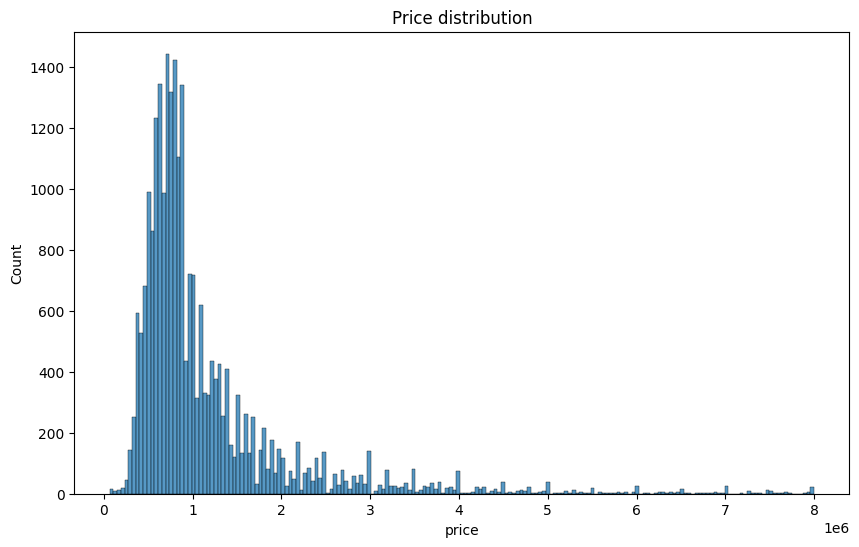

<Figure size 1000x600 with 0 Axes>

In [39]:
# plot price
plt.figure(figsize=(10, 6))
sns.histplot(df_real_estate_LA['price'])
plt.title('Price distribution')

plt.figure(figsize=(10, 6))
plt.show()

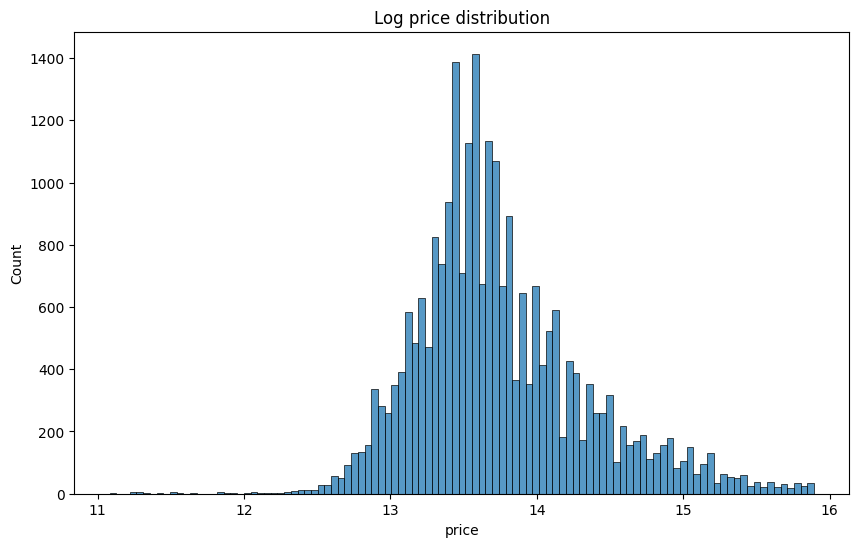

In [40]:
# log price
plt.figure(figsize=(10, 6))
sns.histplot(np.log(df_real_estate_LA['price']))
plt.title('Log price distribution')

plt.show()

In [41]:
# add log price to the dataframe
df_real_estate_LA['log_price'] = np.log(df_real_estate_LA['price'])

In [42]:
df_real_estate_LA['status'] = df_real_estate_LA['status'].astype('category')

In [43]:
response = 'log_price' # response variable
covariables = ['status', 'bed', 'bath', 'house_size', 'acre_lot', 'sold_year', 'crime_rate', 'zip_code'] # covariables

covariables = '+'.join(covariables) # formular for OLS

In [44]:
model = smf.ols(f'{response} ~ {covariables}', data=df_real_estate_LA).fit()
# print full_model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.557
Method:                 Least Squares   F-statistic:                     3882.
Date:                Wed, 05 Jun 2024   Prob (F-statistic):               0.00
Time:                        13:26:06   Log-Likelihood:                -11922.
No. Observations:               24646   AIC:                         2.386e+04
Df Residuals:                   24637   BIC:                         2.394e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          9.9871     11.060      0.

In [45]:
# check VIF
exog = model.model.exog
names = model.params.index
for i in range(1, exog.shape[1]):
    print(f'VIF: {names[i]}: {variance_inflation_factor(exog, i): .3f}')

VIF: status[T.sold]:  1.259
VIF: bed:  2.872
VIF: bath:  3.893
VIF: house_size:  3.313
VIF: acre_lot:  1.001
VIF: sold_year:  1.255
VIF: crime_rate:  1.006
VIF: zip_code:  1.018


In [46]:
covariables = ['bed', 'bath', 'house_size', 'crime_rate'] # delete unsignificant variable
covariables = '+'.join(covariables) # formular for OLS

filted_model = smf.ols(f'{response} ~ {covariables}', data=df_real_estate_LA).fit()
# print full_model summary
print(filted_model.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     5425.
Date:                Wed, 05 Jun 2024   Prob (F-statistic):               0.00
Time:                        13:26:07   Log-Likelihood:                -14189.
No. Observations:               24646   AIC:                         2.839e+04
Df Residuals:                   24641   BIC:                         2.843e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.1773      0.006   2180.031      0.0

In [47]:
# one-hot encoding city
# df_real_estate_LA = pd.get_dummies(df_real_estate_LA, columns=['city'], drop_first=True)
df_real_estate_LA.head(10)

,Unnamed: 0,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,sold_year,crime_rate,log_price
5,1256867,103903.0,for_sale,469900.0,2.0,2.0,0.07,493938.0,Los Angeles,California,90001.0,432.0,2021,6.754873,13.060275
15,1256878,103903.0,for_sale,599000.0,3.0,3.0,0.12,1623816.0,Los Angeles,California,90001.0,898.0,2021,6.754873,13.303017
18,1256881,46425.0,for_sale,895000.0,4.0,4.0,0.16,1767129.0,Los Angeles,California,90001.0,3194.0,2021,6.754873,13.704579
21,1256884,103903.0,for_sale,740000.0,3.0,2.0,0.12,146890.0,Los Angeles,California,90001.0,1400.0,2021,6.754873,13.514405
30,1256894,19591.0,for_sale,574999.0,3.0,1.0,0.10,150541.0,Los Angeles,California,90001.0,1000.0,2022,6.754873,13.262124
33,1256897,83971.0,for_sale,1149900.0,10.0,6.0,0.11,1706139.0,Los Angeles,California,90001.0,3780.0,2020,6.754873,13.955186
42,1257139,109978.0,for_sale,785000.0,7.0,3.0,0.09,70089.0,Los Angeles,California,90003.0,2581.0,2021,0.122455,13.573439
44,1257143,41306.0,for_sale,795000.0,6.0,2.0,0.12,758273.0,Los Angeles,California,90003.0,2292.0,2021,0.122455,13.586097
46,1257145,31870.0,for_sale,650000.0,4.0,2.0,0.12,1038199.0,Los Angeles,California,90003.0,1434.0,2021,0.122455,13.384728
53,1257152,52909.0,for_sale,748888.0,4.0,3.0,0.11,173667.0,Los Angeles,California,90003.0,1478.0,2020,0.122455,13.526345


## Linear_Prediction

In [48]:
covariables = ['bed', 'bath','acre_lot', 'house_size', 'sold_year', 'crime_rate', 'zip_code'] #covariables for ML
response = 'log_price'
X = df_real_estate_LA[covariables]
y = df_real_estate_LA[response]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # split train and test data
X_train_val, X_val, y_train_val, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42) # split train data to train and validation data

In [49]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

# calculate metrics for training, validation and testing data
def metrics(y_train, y_train_pred, y_val, y_val_pred, y_test, y_test_pred):
    # Training metrics
    mse_train = mean_squared_error(y_train, y_train_pred)
    rmse_train = np.sqrt(mse_train)
    mae_train = mean_absolute_error(y_train, y_train_pred)
    r2_train = r2_score(y_train, y_train_pred)
    
    print("Training Metrics:")
    print(f"MSE: {mse_train}, RMSE: {rmse_train}, MAE: {mae_train}, R2: {r2_train}")

    # Validation metrics
    mse_val = mean_squared_error(y_val, y_val_pred)
    rmse_val = np.sqrt(mse_val)
    mae_val = mean_absolute_error(y_val, y_val_pred)
    r2_val = r2_score(y_val, y_val_pred)
    
    
    print("Validation Metrics:")
    print(f"MSE: {mse_val}, RMSE: {rmse_val}, MAE: {mae_val}, R2: {r2_val}")


    # Testing metrics
    mse_test = mean_squared_error(y_test, y_test_pred)
    rmse_test = np.sqrt(mse_test)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)
    

    print("Testing Metrics:")
    print(f"MSE: {mse_test}, RMSE: {rmse_test}, MAE: {mae_test}, R2: {r2_test}")

In [52]:
# 2nd degree polynomial regression
degree=2

model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(X_train, y_train)

y_val_pred = model.predict(X_val) # predict validation data
y_test_pred = model.predict(X_test) # predict test data
y_train_pred = model.predict(X_train) # predict train data

metrics_pr=metrics(y_train, y_train_pred, y_val, y_val_pred, y_test, y_test_pred)

Training Metrics:
MSE: 0.11426878017765003, RMSE: 0.3380366550799632, MAE: 0.2546009182700677, R2: 0.6736217889522305
Validation Metrics:
MSE: 0.11584827208428608, RMSE: 0.3403649101835941, MAE: 0.2555192587062703, R2: 0.6713183415381723
Testing Metrics:
MSE: 0.11172594538053832, RMSE: 0.3342543124337191, MAE: 0.25094013458033554, R2: 0.6721496150789107


## Neural Network model

In [88]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


nn_model = Sequential([
    Dense(128, activation='relu', input_dim=X_train.shape[1]),
    Dropout(0.2),  # Add dropout to prevent overfitting
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1, activation='linear')
])

# nn_model = Sequential([
#     Dense(64, activation='relu', input_dim=X_train.shape[1]),
#     Dense(32, activation='relu'),
#     Dense(16, activation='relu'),
#     Dense(1, activation='linear')
# ])

# Compile the model
nn_model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Summary of the model
nn_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_29 (Dense)            (None, 128)               1024      
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_30 (Dense)            (None, 64)                8256      
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_31 (Dense)            (None, 32)                2080      
                                                                 
 dropout_8 (Dropout)         (None, 32)                0         
                                                                 
 dense_32 (Dense)            (None, 16)               

In [89]:
# train the model
history = nn_model.fit(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val), epochs=30, batch_size=32, verbose=0)
mse_test = nn_model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Test MSE: {mse_test}")

Test MSE: 0.10588397830724716


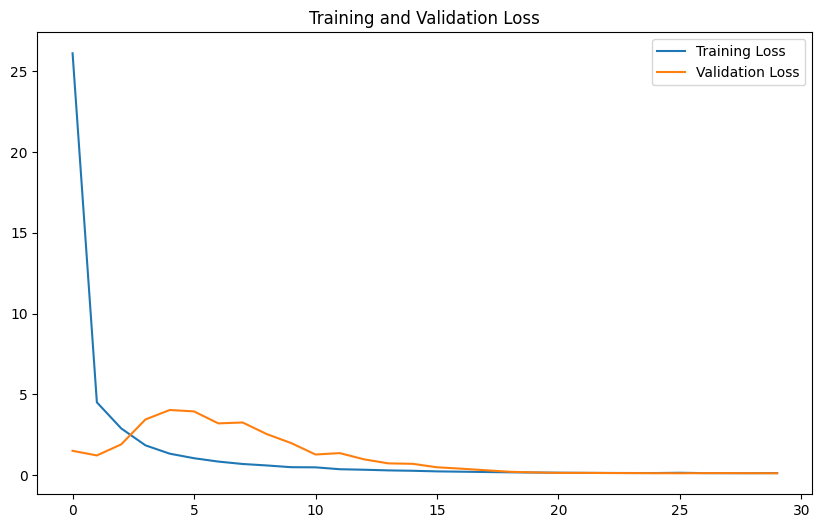

In [90]:
# Plot training history
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [91]:
predict_df = pd.DataFrame({'Actual': np.exp(y_test), 'Polynomial': np.exp(model.predict(X_test)) , 'Neural Network': np.exp(nn_model.predict(X_test_scaled)).flatten()})

predict_df.head(10)

155/155 [==============================] - 0s 1ms/step


,Actual,Polynomial,Neural Network
32371,749900.0,6.143905e+05,7.277960e+05
22699,675000.0,7.234260e+05,6.702744e+05
34240,499000.0,7.945524e+05,8.471366e+05
16499,899000.0,8.960207e+05,9.415712e+05
32892,999950.0,7.609799e+05,8.872142e+05
25261,1615000.0,1.324695e+06,1.487723e+06
32143,1095000.0,1.068595e+06,1.141292e+06
34479,469900.0,5.659140e+05,5.652028e+05
28056,900000.0,7.063356e+05,7.933968e+05
10966,1100000.0,1.007323e+06,1.037099e+06


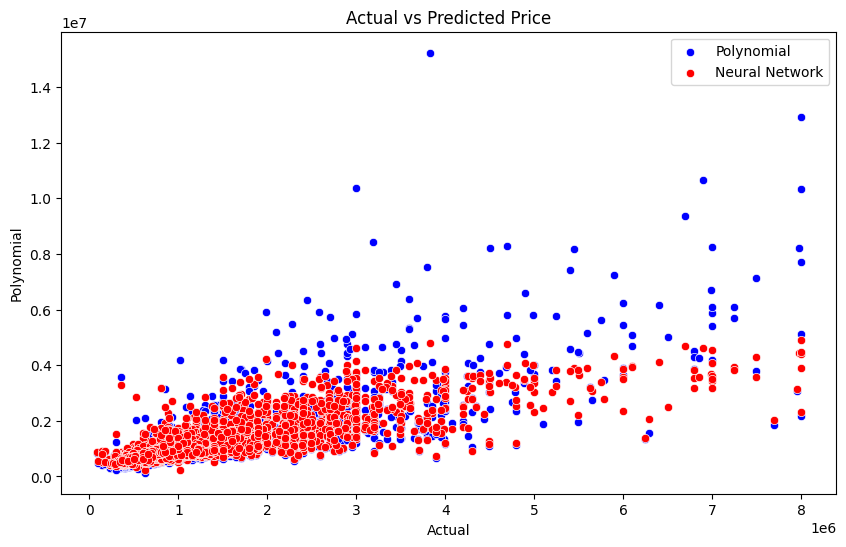

In [92]:
plt.figure(figsize=(10, 6))

# Plot Actual vs. Polynomial Predicted Price
sns.scatterplot(x='Actual', y='Polynomial', data=predict_df, label='Polynomial', color='blue')

# Plot Actual vs. Neural Network Predicted Price
sns.scatterplot(x='Actual', y='Neural Network', data=predict_df, label='Neural Network', color='red')

# Add a title and legend
plt.title('Actual vs Predicted Price')
plt.legend()

# Display the plot
plt.show()